In [1]:
push!(LOAD_PATH, "/home/zhenan/Github/AtomicOpt.jl")
using AtomicOpt
using Plots
using Images
using LinearAlgebra
using SparseArrays

## Load data

In [2]:
x1 = Vector{Float64}()
x2 = Vector{Float64}()
x3 = Vector{Float64}()
x4 = Vector{Float64}()
b = Vector{Float64}()
kr1 = 0
kr2 = Vector{Int64}()
kr3 = Vector{Int64}()
kr4 = 0
m = 0
n = 0
lines = readlines("./MultiscaleData.txt", keep=true)
for line in lines
    info = split(line)
    if length(info) ≥ 1
        if info[1] == "x1"
            for s in info[3:end]
                push!(x1, parse(Float64, s))
            end
        elseif info[1] == "x2"
            for s in info[3:end]
                push!(x2, parse(Float64, s))
            end
        elseif info[1] == "x3"
            for s in info[3:end]
                push!(x3, parse(Float64, s))
            end
        elseif info[1] == "x4"
            for s in info[3:end]
                push!(x4, parse(Float64, s))
            end
        elseif info[1] == "b"
            for s in info[3:end]
                push!(b, parse(Float64, s))
            end
        elseif info[1] == "kr1"
            kr1 = parse(Int64, info[3])
        elseif info[1] == "kr2"
            for s in info[3:end]
                push!(kr2, parse(Int64, s))
            end
        elseif info[1] == "kr3"
            for s in info[3:end]
                push!(kr3, parse(Int64, s))
            end
        elseif info[1] == "kr4"
            kr4 = parse(Int64, info[3])
        elseif info[1] == "m"
            m = parse(Int64, info[3])
        elseif info[1] == "n"
            n = parse(Int64, info[3])
        end
    end
end

## Plot observation

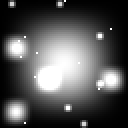

In [3]:
colorview(Gray, reshape(b, m, n))

## Construct atomic sets

In [4]:
A1 = OneBall(m*n, maxrank=kr1); A1 = gauge(A1, x1)*A1
A2 = BlkNucBall(m, n, 4, 4, reshape(kr2, 16, 16)); A2 = gauge(A2, x2)*A2
A3 = BlkNucBall(m, n, 16, 16, reshape(kr3, 4, 4)); A3 = gauge(A3, x3)*A3
A4 = NucBall(m, n, maxrank=kr4); A4 = gauge(A4, x4)*A4
A = A1 + A2 + A3 + A4

atomic set  : Sum of atomic sets
description : A₁ + A₂ + ⋯
parameters  : 4 sets; n = 4096

## Solve demixing problem

In [5]:
sol = level_set(I(m*n), b, A, tol = 1e-3, maxIts=5000)


  -------------------------------------------------------------------------
  Polar Level Set Method
  -------------------------------------------------------------------------
  number of variables       4096         number of constraints    4096
  feasibility tolerance  3.20e-02         α                    0.00e+00
  max iterations            5000 
  -------------------------------------------------------------------------
  Major      Minor        u-α        ℓ-α        gap          τ         infeas-α  Subproblem
      1          2   1.69e+02   1.55e+01   1.54e+02   3.95e-01       4.79e+02   suboptimal
      2          1   1.52e+02   8.31e+01   6.84e+01   4.21e-01       4.79e+02   suboptimal
      3          2   8.21e+01   1.56e+01   6.65e+01   5.68e-01       4.79e+02   suboptimal
      4          1   6.68e+01   1.71e+01   4.97e+01   6.06e-01       4.79e+02   suboptimal
      5          1   5.15e+01   1.89e+01   3.26e+01   6.55e-01       4.79e+02   suboptimal
      6          2   3

Solution{AbstractFace, Vector{Float64}, Float64}(face of atomic set  : Face of the sum of atomic sets
parameters          : rank = (10, 256, 16, 1); n = 4096, face of atomic set  : Face of the sum of atomic sets
parameters          : rank = (10, 256, 16, 1); n = 4096, [0.09972540117310523, 0.0995428238359226, 0.0986793597709744, 0.09905976985216516, 0.09952928798602331, 0.09876130125233142, 0.00037600760166818444, 0.00035773549198245415, 0.09776547934862866, 0.00024254005487009815  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25017436754664396, 0.0, 0.9928147927333641], [0.09980092141872249, 0.09942691690188406, 0.0982955662385411, 0.09977209162584962, 0.0013472136621259902, 0.001218863717974433, 0.0004403338604463483, 0.00026296095965729104, 0.0013803211798019363, 0.00011738182164023951  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24984283955613523, 0.0, 0.9975934058471762], 1.6735905414015775, 3.0722359556047554, [-2.072982787262414e-5, -5.0968626228757724e-5, -8.937886214601799e-5, -0.000129

## Plot result

In [6]:
# construct primal
x = constructPrimal(sol);

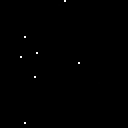

In [7]:
colorview(Gray, reshape(x[1], m, n))

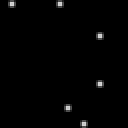

In [8]:
colorview(Gray, reshape(x[2], m, n))

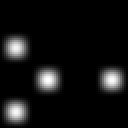

In [9]:
colorview(Gray, reshape(x[3], m, n))

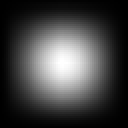

In [10]:
colorview(Gray, reshape(x[4], m, n))